# Predicting heart disease using ML
This nb uses various Py-based ML and DS libraries in an attempt to build a Machine learning model that predicts, given enough medical data whether a person has heart disease.

Steps:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem def:
>Create a machine learning model using Python libraries to predict whether a person has heart disease.

## 2. Data: 
>The original data comes from Cleveland data from the UCI Machine learning Repo.

>A copy of this data can be found on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

## 3. Evaluation:
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project

## 4. Features:
>This is where you get info about each of the features in the data.

**Data Dictionary**


1. age- age in years

2. sex- (1 = male; 0 = female)

3. cp- chest pain type
      * 0: Typical angina: chest pain related decrease blood supply to the heart
      * 1: Atypical angina: chest pain not related to heart
      * 2: Non-anginal pain: typically esophageal spasms (non heart related)
      * 3: Asymptomatic: chest pain not showing signs of disease

4. trestbps- resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5. chol- serum cholestoral in mg/dl
      * serum = LDL + HDL + .2 * triglycerides
      * above 200 is cause for concern

6. fbs- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
      * '>126' mg/dL signals diabetes

7. restecg- resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
      * can range from mild symptoms to severe problems
      * signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
      * Enlarged heart's main pumping chamber

8. thalach- maximum heart rate achieved

9. exang- exercise induced angina (1 = yes; 0 = no)

10. oldpeak- ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. slope- the slope of the peak exercise ST segment
       * 0: Upsloping: better heart rate with excercise (uncommon)
       * 1: Flatsloping: minimal change (typical healthy heart)
       * 2: Downslopins: signs of unhealthy heart

12. ca- number of major vessels (0-3) colored by flourosopy
       * colored vessel means the doctor can see the blood passing through
       * the more blood movement the better (no clots)

13. thal- thalium stress result 
       * 3 = normal; 
       * 6 = fixed defect; 
       * 7 = reversable defect

14. target- have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools
Using pandas, Matplotlib and NumPy for data analysis and manipulation

In [1]:
#Import all tools we need
#Regular EDA-expolatory data analysis and plotting libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 #plots appear inside the nb.
%matplotlib inline

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model eval
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("./data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (Exploratory data analysis)
The goal here is to become a subject matter expert on the dataset

1. What questions are you trying to solve?
2. What kind of data do we have and how to we treat different types?
3. What is missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add/change/remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
#finding how many of each class there are
df["target"].value_counts()
#165-1, 138-0 . so this is a fairly balanced problem

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

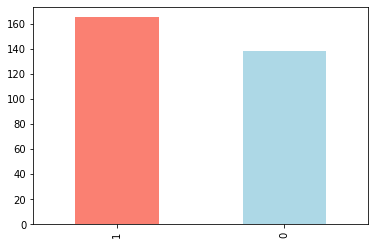

In [8]:
df["target"].value_counts().plot(kind = "bar", color= ["salmon", "lightblue"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding patterns in the data

### Heart Disease Frequency according to gender 

In [12]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Compare target column with sex column
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

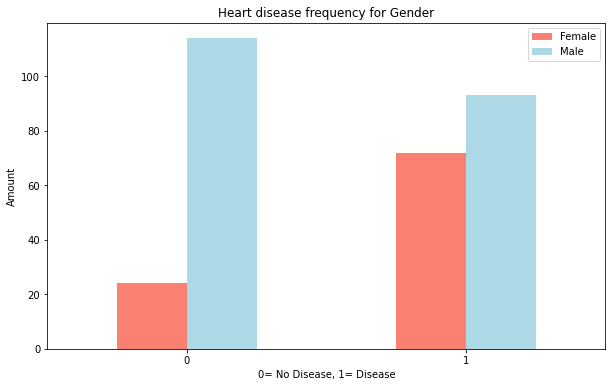

In [23]:
#Create a plot of crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar",
                                         figsize = (10,6),
                                         color= ["salmon", "lightblue"])
plt.title("Heart disease frequency for Gender")
plt.xlabel("0= No Disease, 1= Disease" )
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation =0)

### Heart Disease frequency according to age & thalach (max-heart rate)

In [31]:
# df["thalach"].value_counts() 
#length=91. there are many too many different values. bar graph may not work

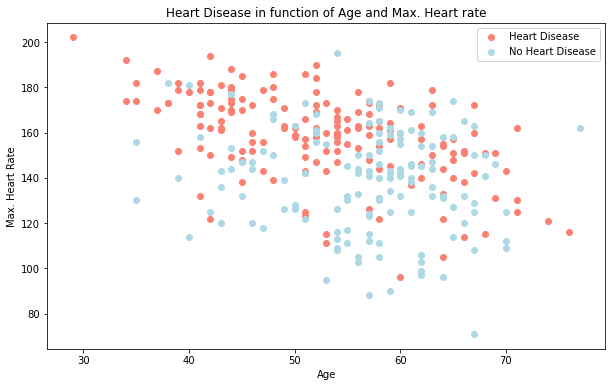

In [30]:
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target ==1],
           df.thalach[df.target ==1],
           c="salmon")

plt.scatter(df.age[df.target ==0],
           df.thalach[df.target==0],
           c ="lightblue")

#add some helpful info
plt.title("Heart Disease in function of Age and Max. Heart rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"])

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

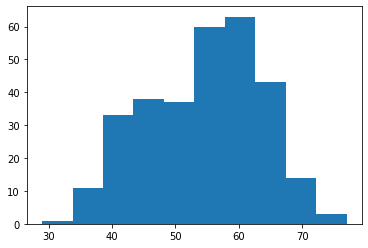

In [35]:
# Check distribution of the age column with a histogram
plt.hist(df.age)

### Heart disease freq according to Chest pain type.

In [37]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [ ]:
# 0: Typical angina: chest pain related decrease blood supply to the heart
# 1: Atypical angina: chest pain not related to heart
# 2: Non-anginal pain: typically esophageal spasms (non heart related)
# 3: Asymptomatic: chest pain not showing signs of disease

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

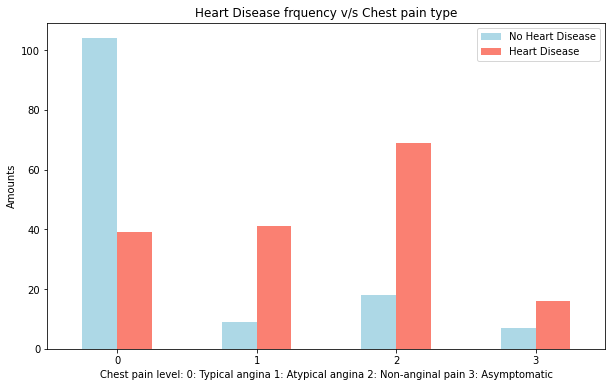

In [52]:
pd.crosstab(df.cp, df.target).plot(kind= "bar", figsize= (10,6),
                                  color=["lightblue", "salmon"])
plt.xlabel("Chest pain level: 0: Typical angina 1: Atypical angina 2: Non-anginal pain 3: Asymptomatic")
plt.ylabel("Amounts")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.title("Heart Disease frquency v/s Chest pain type")
plt.xticks(rotation=0)

## Corelation matrix
View how each of the independent variables affect the target(dependent variable)

In [53]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


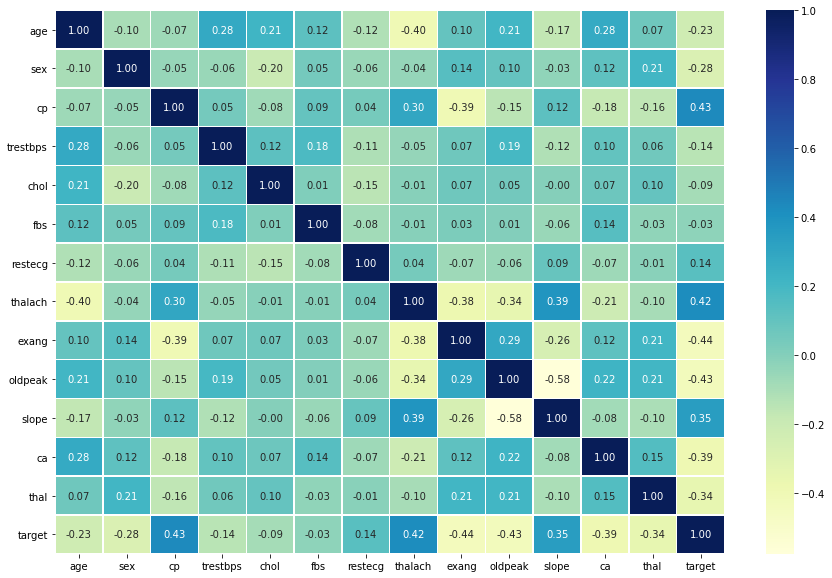

In [54]:
# making corelation matrix a litttle more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot= True,
                linewidths= 0.5,
                fmt= ".2f",
                cmap= "YlGnBu")

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

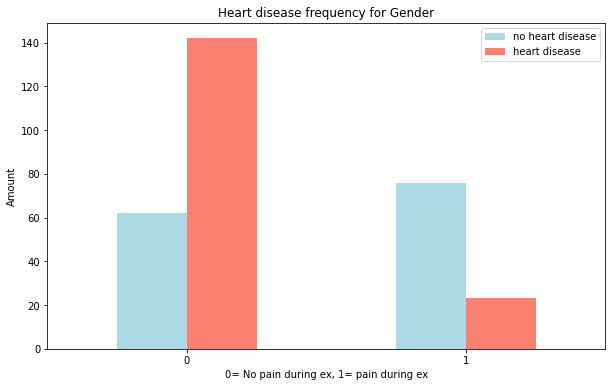

In [58]:
#Visual representation of Negative correlation between exang and target
#logically, this sounds absurd. 
pd.crosstab(df["exang"], df["target"]).plot(kind="bar",
                                         figsize = (10,6),
                                         color= ["lightblue", "salmon"])
plt.title("Heart disease frequency for exersice induced angina")
plt.xlabel("0= No pain during ex, 1= pain during ex" )
plt.ylabel("Amount")
plt.legend(["no heart disease", "heart disease"])
plt.xticks(rotation =0)
